## Project 1: BigMart sales problem solution using machine learning.
#### Project by Umang Mehta Intern at Nuclei Technology.

In [1]:
#Importing Useful libraries for data analysis.
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
#Loading datasets
train=pd.read_csv(r"C:\Users\umang\Desktop\Internship-NT(Project1)\Train_UWu5bXk.csv")
test=pd.read_csv(r"C:\Users\umang\Desktop\Internship-NT(Project1)\Test_u94Q5KV.csv")
train.head()



,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
#Displaying the dataset
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


#### Describing the shape

In [5]:
#Displaying rows and columns of train data set
train.shape

(8523, 12)

In [6]:
#Displaying rows and columns of test data set
test.shape

(5681, 11)

In [7]:
train.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [8]:
#adding a new column item_outlet_sales with null value for further process
test["Item_Outlet_Sales"]=NaN
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1,NaN
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1,NaN
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store,NaN
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1,NaN
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3,NaN


# Data Exploration

In [9]:
#combining test and train dataset for analysis
combi=pd.concat([train, test])
combi.shape
combi.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [10]:
#Box Plot
combi.describe()
#Item_Visibilty has 0 as value which is not possible and has to be dealt.

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,11765.000000,14204.000000,14204.000000,14204.000000,8523.000000
mean,12.792854,0.065953,141.004977,1997.830681,2181.288914
std,4.652502,0.051459,62.086938,8.371664,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.710000,0.027036,94.012000,1987.000000,834.247400
50%,12.600000,0.054021,142.247000,1999.000000,1794.331000
75%,16.750000,0.094037,185.855600,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [11]:
combi.isnull().sum()
#Item_Weight, Outlet_Size missing values has to be dealt.

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
dtype: int64

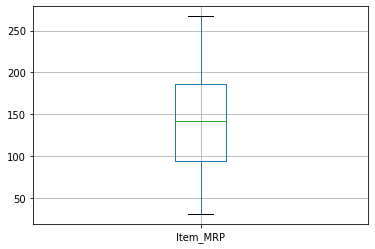

In [12]:
combi.boxplot(column="Item_MRP")
#No outlier found

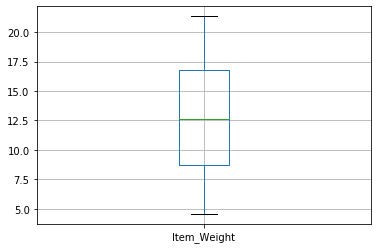

In [13]:
combi.boxplot(column="Item_Weight")
#No outlier found

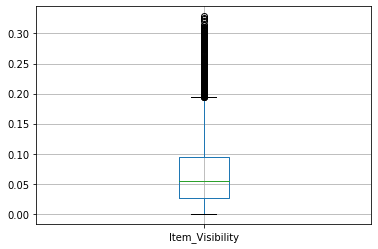

In [14]:
combi.boxplot(column="Item_Visibility")
#Outlier found

# Univariate Data Analysis

### Lets first segreagate continous and categorical data
#### Continous data columns: Item_weight,Item_Visibility, Item_MRP
#### Categorical data columns: Item_fat_Content, Item_type, outlet_identifier, outlet_size, outlet_establishment_year, outlet_type

C:\Users\umang\anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\umang\anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


Text(0, 0.5, 'Count')

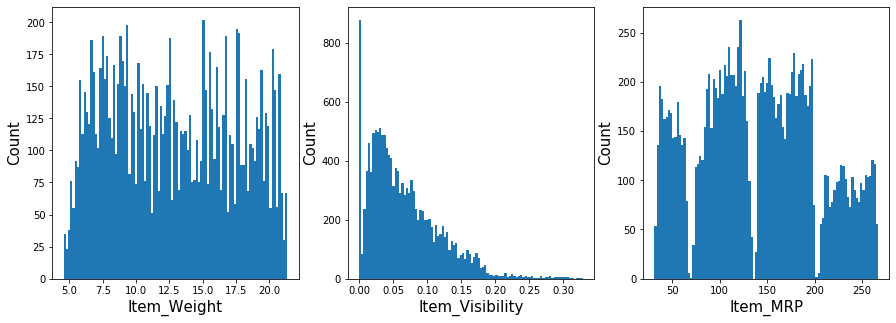

In [15]:
#Plotting histogram for all continous data columns
#Reference:https://matplotlib.org/3.1.1/gallery/statistics/hist.html
fig,axs = plt.subplots(nrows=1, ncols=3,figsize=(15,5))
#For Item_Weight
axs[0].hist(combi["Item_Weight"],bins=100)
axs[0].set_xlabel("Item_Weight",size=15)
axs[0].set_ylabel("Count",size=15)
#For Item_Visibility
axs[1].hist(combi["Item_Visibility"],bins=100)
axs[1].set_xlabel("Item_Visibility",size=15)
axs[1].set_ylabel("Count",size=15)
#For Item_MRP
axs[2].hist(combi["Item_MRP"],bins=100)
axs[2].set_xlabel("Item_MRP",size=15)
axs[2].set_ylabel("Count",size=15)
#Observation after plotting
#There is no clear pattern in Item_Weight and Item_MRP, but Item_Visibility is right(Positive)-skewed and should be Normalised.

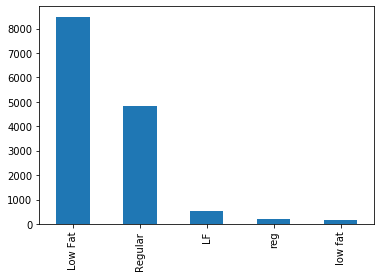

In [16]:
combi["Item_Fat_Content"].value_counts().plot(kind="bar")
#Mismatched levels observed

Text(0, 0.5, 'Count')

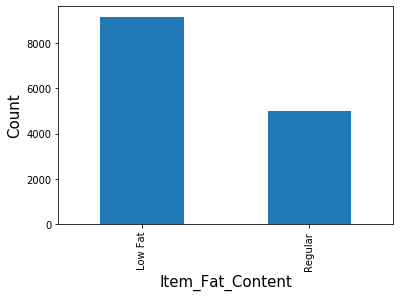

In [17]:
combi['Item_Fat_Content'].replace('LF','Low Fat', inplace=True)
combi['Item_Fat_Content'].replace('low fat','Low Fat', inplace=True)
combi['Item_Fat_Content'].replace('reg','Regular', inplace=True)
combi["Item_Fat_Content"].value_counts().plot(kind="bar")
plt.xlabel("Item_Fat_Content", size=15)
plt.ylabel("Count",size=15)
#Mismatched levels removed

Text(0, 0.5, 'Count')

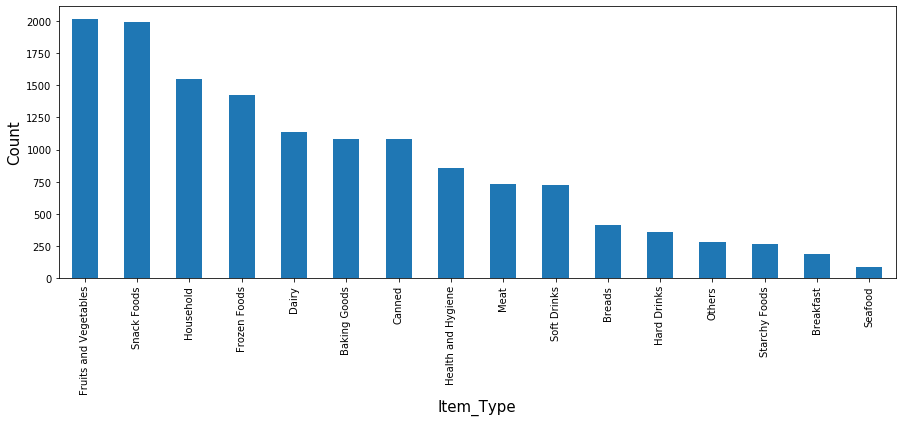

In [18]:
plt.figure(figsize=(15,5))
combi['Item_Type'].value_counts().plot(kind='bar')
plt.xlabel("Item_Type",size=15)
plt.ylabel("Count",size=15)
#Fruits and vegetables plays has the number of customers follwed by snack foods.

Null value replaced by small and has become zero now: 0


Text(0, 0.5, 'Count')

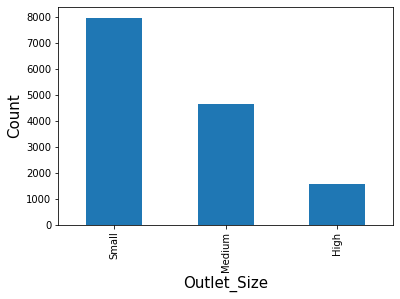

In [19]:
#We have observed that there are 4016 missing values in Outlet_Size, So I've replaced it with its mode value that is "Small"
combi["Outlet_Size"].fillna("Small",inplace=True)
print("Null value replaced by small and has become zero now:",combi["Outlet_Size"].isnull().sum())
combi["Outlet_Size"].value_counts().plot(kind="bar")
plt.xlabel("Outlet_Size",size=15)
plt.ylabel("Count",size=15)
#Outlet_size had unmatched levels as in 4016 observations where ull and is being replaced successfully

Text(0, 0.5, 'Count')

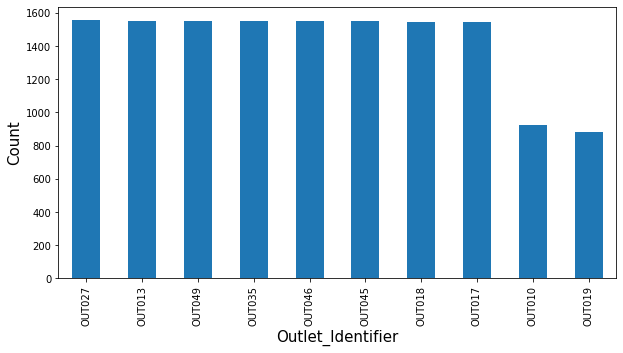

In [20]:
plt.figure(figsize=(10,5))
combi['Outlet_Identifier'].value_counts().plot(kind='bar')
plt.xlabel("Outlet_Identifier",size=15)
plt.ylabel("Count",size=15)

Text(0, 0.5, 'Count')

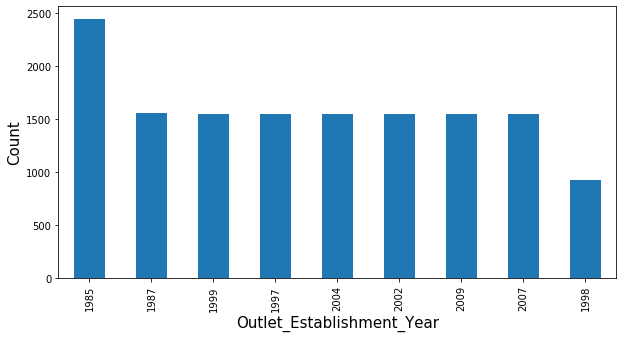

In [21]:
plt.figure(figsize=(10,5))
combi['Outlet_Establishment_Year'].value_counts().plot(kind='bar')
plt.xlabel("Outlet_Establishment_Year",size=15)
plt.ylabel("Count",size=15)

Text(0, 0.5, 'Count')

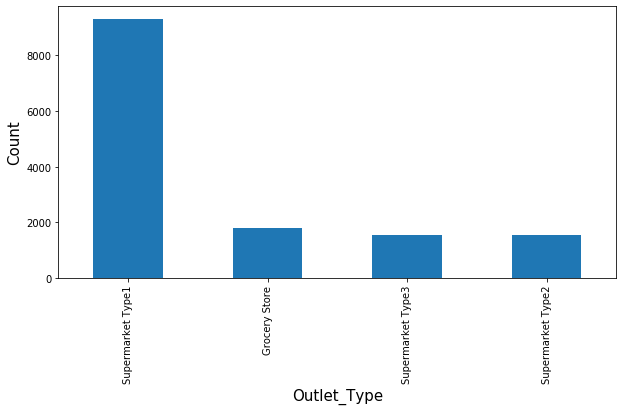

In [22]:
plt.figure(figsize=(10,5))
combi['Outlet_Type'].value_counts().plot(kind='bar')
plt.xlabel("Outlet_Type",size=15)
plt.ylabel("Count",size=15)
#Supermarket Type1 has is a popular category for people to visit.

# Bivariate Data Analysis of Continous and Categorical Data

### Sactter plot for continous variables against the response variable

Text(0, 0.5, 'Item_Outlet_Sales')

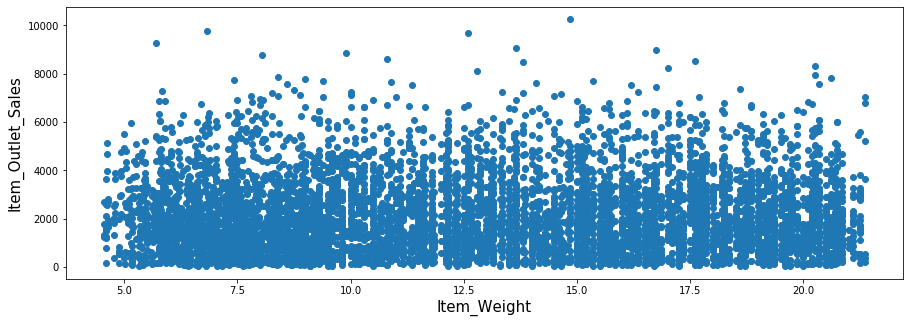

In [23]:
plt.figure(figsize=(15,5))
plt.scatter(combi["Item_Weight"],combi["Item_Outlet_Sales"])
plt.xlabel("Item_Weight",size=15)
plt.ylabel("Item_Outlet_Sales",size=15)
#No pattern observed

Text(0, 0.5, 'Item_Outlet_Sales')

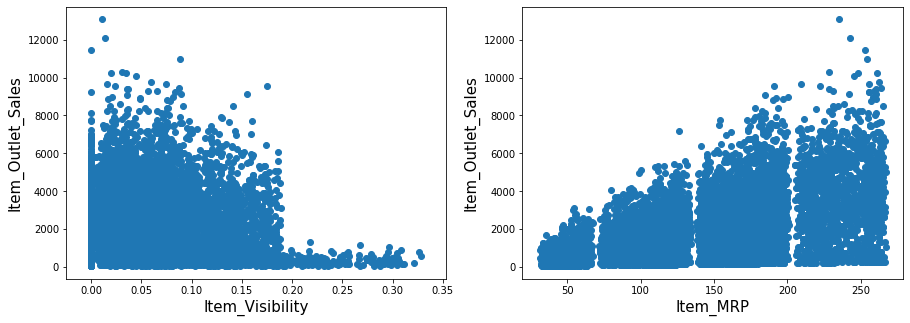

In [24]:
fig,ax2=plt.subplots(1,2,figsize=(15,5))
#for Item_Visibility
ax2[0].scatter(combi["Item_Visibility"],combi["Item_Outlet_Sales"])
ax2[0].set_xlabel("Item_Visibility",size=15)
ax2[0].set_ylabel("Item_Outlet_Sales",size=15)
#for Item_MRP
ax2[1].scatter(combi["Item_MRP"],combi["Item_Outlet_Sales"])
ax2[1].set_xlabel("Item_MRP",size=15)
ax2[1].set_ylabel("Item_Outlet_Sales",size=15)
#Item visibilty is right skewed and has string of points at 0 which has to be dealt and Item_MRP is clearly segregated in 4 regions which can be useful.

### Bar Graph for categorical variables against response variable

Text(0, 0.5, 'Item_Outlet_Sales')

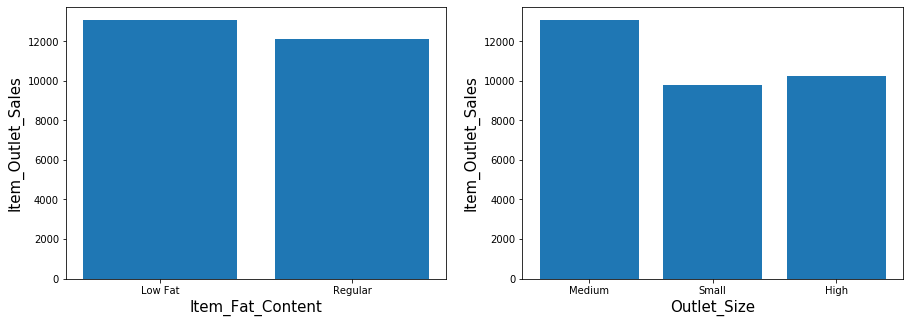

In [25]:
fig,ax3=plt.subplots(1,2,figsize=(15,5))
#for Item_Fat_Content
ax3[0].bar(combi["Item_Fat_Content"],combi["Item_Outlet_Sales"])
ax3[0].set_xlabel("Item_Fat_Content",size=15)
ax3[0].set_ylabel("Item_Outlet_Sales",size=15)
#for Item_Outlet_Size
ax3[1].bar(combi["Outlet_Size"],combi["Item_Outlet_Sales"])
ax3[1].set_xlabel("Outlet_Size",size=15)
ax3[1].set_ylabel("Item_Outlet_Sales",size=15)


Text(0, 0.5, 'Item_Outlet_Sales')

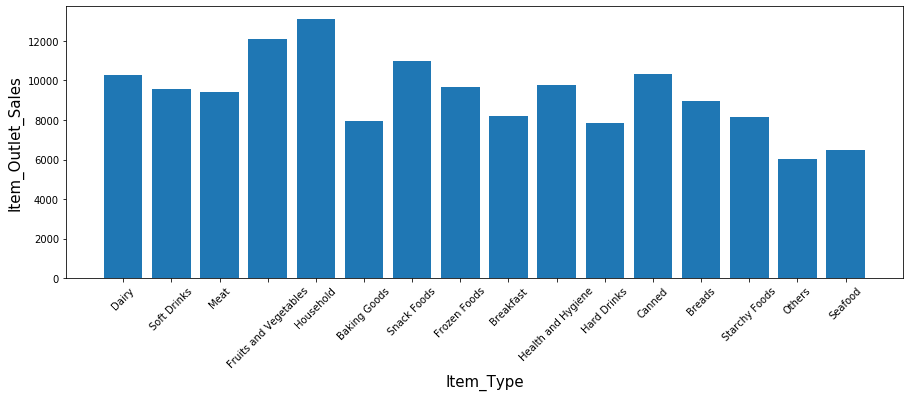

In [26]:
plt.figure(figsize=(15,5))
plt.bar(combi["Item_Type"],combi["Item_Outlet_Sales"])
plt.xticks(rotation=45)
plt.xlabel("Item_Type",size=15)
plt.ylabel("Item_Outlet_Sales",size=15)
#As observed from univariate analysis and from bivariate analysis too, fruits and vegetables, snack foods plays a crucial role in outlet sales

Text(0, 0.5, 'Item_Outlet_Sales')

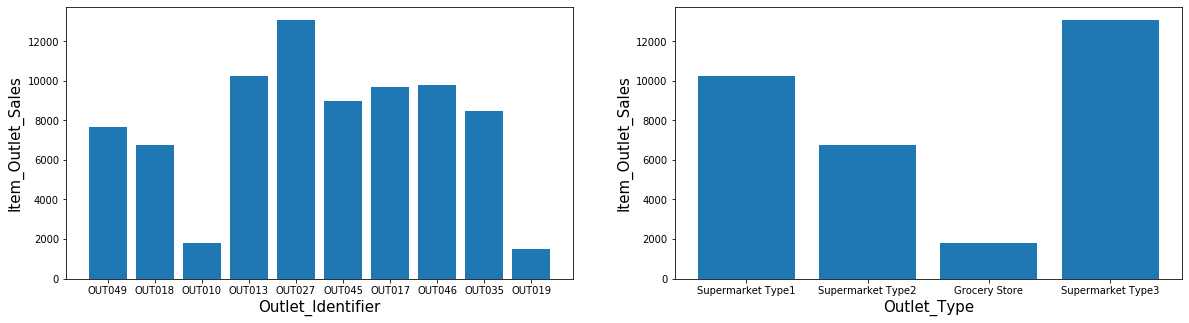

In [27]:
fig,ax3=plt.subplots(1,2,figsize=(20,5))
#for Outlet_Establishment_Year
ax3[0].bar(combi["Outlet_Identifier"],combi["Item_Outlet_Sales"])
ax3[0].set_xlabel("Outlet_Identifier",size=15)
ax3[0].set_ylabel("Item_Outlet_Sales",size=15)
#for Item_Outlet_Size
ax3[1].bar(combi["Outlet_Type"],combi["Item_Outlet_Sales"])
ax3[1].set_xlabel("Outlet_Type",size=15)
ax3[1].set_ylabel("Item_Outlet_Sales",size=15)


Text(0, 0.5, 'Item_Outlet_Sales')

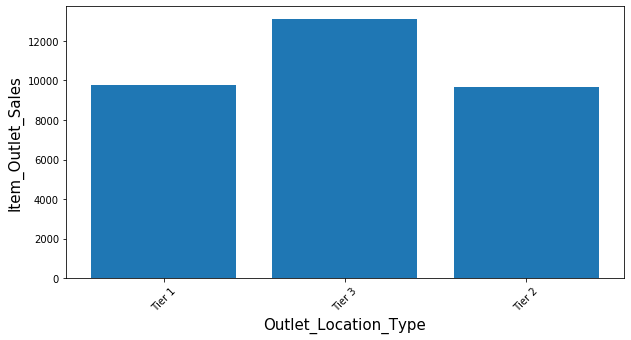

In [28]:
plt.figure(figsize=(10,5))
plt.bar(combi["Outlet_Location_Type"],combi["Item_Outlet_Sales"])
plt.xticks(rotation=45)
plt.xlabel("Outlet_Location_Type",size=15)
plt.ylabel("Item_Outlet_Sales",size=15)
#No pattern observed

# Missing value treatment
### From the above analysis Item_Weight has missing values and Item_Visibility has avalue zero, so lets deal with it

In [29]:
# Replacing the null values in item weight by its median
combi["Item_Weight"].fillna(combi["Item_Weight"].mean(),inplace=True)
combi.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
dtype: int64

In [30]:
#Treating null values of Outlet_Size
combi["Outlet_Size"].fillna("Small",inplace=True)
combi["Outlet_Size"].isnull().sum()

0

In [31]:
#Replacing all the zeros in visibility by its mean value

mean_Item_Visibility = combi['Item_Visibility'].mean()
print (mean_Item_Visibility)
combi['Item_Visibility']=combi.Item_Visibility.mask(combi.Item_Visibility == 0,mean_Item_Visibility)
z=(combi["Item_Visibility"]==0)
print(z)
#Zeros been replaced by its mean

0.06595278007399345
0       False
1       False
2       False
3       False
4       False
        ...  
5676    False
5677    False
5678    False
5679    False
5680    False
Name: Item_Visibility, Length: 14204, dtype: bool


# Feature Engineering

In [32]:
#F1:Outlet_Years
combi["Outlet_Years"]=2013 - combi["Outlet_Establishment_Year"]
combi['Outlet_Years'].describe()
#Outlets which are 4-28 years old.

count    14204.000000
mean        15.169319
std          8.371664
min          4.000000
25%          9.000000
50%         14.000000
75%         26.000000
max         28.000000
Name: Outlet_Years, dtype: float64

In [33]:
#F2:Item_Type_New
combi["Item_Type_New"]=combi["Item_Identifier"].apply(lambda x: x[0:2])
combi['Item_Type_New'] = combi['Item_Type_New'].map({'FD':'Food','NC':'Non-Consumable','DR':'Drinks'})                                                                                                                      
combi['Item_Type_New'].value_counts()

Food              10201
Non-Consumable     2686
Drinks             1317
Name: Item_Type_New, dtype: int64

In [34]:
#New Conclusion
combi.pivot_table(values='Item_Outlet_Sales',index='Outlet_Location_Type')
#Tier 2 and 3 has almost the same sales.

,Item_Outlet_Sales
Outlet_Location_Type,
Tier 1,1876.909159
Tier 2,2323.990559
Tier 3,2279.627651


In [35]:
#changing Non-consumable to non-edible in Item_Fat_Content
combi.loc[combi["Item_Type_New"]=="Non-Consumable","Item_Fat_Content"]="Non-Edible"
combi["Item_Fat_Content"].value_counts()

Low Fat       6499
Regular       5019
Non-Edible    2686
Name: Item_Fat_Content, dtype: int64

In [36]:
#F3:Segregating Item_Tpye to Perishable and non-perishable for simplicity.
#Reference:https://rstudio-pubs-static.s3.amazonaws.com/381886_981132516a8e437284327a405ca4d91a.html# 
#R approach converted to python code 
#learned a new function of numpy np.select
perishable = ["Breads", "Breakfast", "Dairy", "Fruits and Vegetables", "Meat", "Seafood"]
non_perishable = ["Baking Goods", "Canned", "Frozen Foods", "Hard Drinks", "Health and Hygiene", "Household", "Soft Drinks"]
conditions = [(combi['Item_Type'].isin(perishable)),(combi['Item_Type'].isin(non_perishable))]
choices = ['perishable', 'non_perishable']
combi['Item_Type1'] = np.select(conditions, choices, default='non_perishable')
combi['Item_Type1'].value_counts()

non_perishable    9628
perishable        4576
Name: Item_Type1, dtype: int64

In [37]:
combi.shape
combi.head()
#Three more columns been added

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Years,Item_Type_New,Item_Type1
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,14,Food,perishable
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,4,Drinks,non_perishable
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,14,Food,perishable
3,FDX07,19.20,Regular,0.065953,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,15,Food,perishable
4,NCD19,8.93,Non-Edible,0.065953,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,26,Non-Consumable,non_perishable


# Label Encoding and One Hot Encoding

In [38]:
#Label Encoding
from sklearn.preprocessing import LabelEncoder
#New variable for Outlet_Identifier
le=LabelEncoder()
combi['Outlet'] = le.fit_transform(combi['Outlet_Identifier'])
var_mod=['Item_Fat_Content',"Outlet_Size",'Outlet_Location_Type','Outlet_Type',"Item_Type_New","Outlet","Item_Type1"]

for i in var_mod:
    combi[i]=le.fit_transform(combi[i].astype(str))
    
combi.dtypes    


Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content               int32
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                    int32
Outlet_Location_Type           int32
Outlet_Type                    int32
Item_Outlet_Sales            float64
Outlet_Years                   int64
Item_Type_New                  int32
Item_Type1                     int32
Outlet                         int32
dtype: object

In [39]:
#One Hot Coding for the variable which has more than two categorical data
combi = pd.get_dummies(combi, columns=['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Outlet_Type',
                              'Item_Type_New','Outlet'])

In [41]:
#Removing columns which has given more precise informative columns
#Learned something new
combi.drop(["Item_Type","Outlet_Establishment_Year"],axis=1,inplace=True)
combi.shape

(14204, 34)

In [42]:
combi.shape

(14204, 34)

In [43]:
combi.head()
#Now we all the values in numbers, we should proceed towards modeling

,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Outlet_Identifier,Item_Outlet_Sales,Outlet_Years,Item_Type1,Item_Fat_Content_0,Item_Fat_Content_1,...,Outlet_0,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
0,FDA15,9.30,0.016047,249.8092,OUT049,3735.1380,14,1,1,0,...,0,0,0,0,0,0,0,0,0,1
1,DRC01,5.92,0.019278,48.2692,OUT018,443.4228,4,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,FDN15,17.50,0.016760,141.6180,OUT049,2097.2700,14,1,1,0,...,0,0,0,0,0,0,0,0,0,1
3,FDX07,19.20,0.065953,182.0950,OUT010,732.3800,15,1,0,0,...,1,0,0,0,0,0,0,0,0,0
4,NCD19,8.93,0.065953,53.8614,OUT013,994.7052,26,0,0,1,...,0,1,0,0,0,0,0,0,0,0


# Modelling

### Lets deal with the skewness of Item_Visibility

In [44]:
combi["Item_Visibility"].skew()

1.320682723150534

In [46]:
print("Before apllying square root:",combi["Item_Visibility"].skew())
combi["Item_Visibility"]=np.sqrt(np.sqrt(combi["Item_Visibility"]))
print("After applying square root:",combi["Item_Visibility"].skew())

#As you can see the Item_Visibility skewness is being nearly normalised. 

Before apllying square root: 1.320682723150534
After applying square root: -0.024345084811864457


In [47]:
x=combi['Item_Visibility'].corr(combi["Item_MRP"])
print(x)

-0.003666107292348487


In [49]:
pd.DataFrame.corr(combi)
#Since there is no such greater correlation between a speciic column w.r.t other columns lets move to modelling now

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Outlet_Years,Item_Type1,Item_Fat_Content_0,Item_Fat_Content_1,Item_Fat_Content_2,Outlet_Location_Type_0,...,Outlet_0,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
Item_Weight,1.000000e+00,-0.014883,0.033002,0.011083,-0.000462,0.020140,-0.012021,0.052037,-0.030101,0.001757,...,-0.004362,-0.000390,-0.000888,0.000890,3.549387e-14,4.870556e-14,0.000960,0.000350,0.001691,0.000839
Item_Visibility,-1.488268e-02,1.000000,-0.003666,-0.108199,0.071423,0.041820,0.020123,-0.088308,0.051371,0.045024,...,0.160991,-0.032823,-0.031126,-0.034068,1.749870e-01,-3.375612e-02,-0.030757,-0.029726,-0.033817,-0.036629
Item_MRP,3.300183e-02,-0.003666,1.000000,0.567574,-0.000141,0.031091,-0.003337,0.009151,-0.004019,-0.000658,...,0.000658,0.000697,-0.000034,-0.000023,-1.045579e-03,4.167967e-05,0.000576,-0.000832,-0.001032,0.000892
Item_Outlet_Sales,1.108344e-02,-0.108199,0.567574,1.000000,0.049135,0.024315,-0.009438,-0.010861,0.018719,-0.111287,...,-0.284883,0.024170,0.032610,-0.038059,-2.772498e-01,3.111920e-01,0.052823,0.002274,0.019803,0.034264
Outlet_Years,-4.620424e-04,0.071423,-0.000141,0.049135,1.000000,0.002811,-0.000547,0.000864,-0.000137,0.201609,...,-0.005338,0.453297,-0.382375,-0.466286,3.938921e-01,5.381668e-01,-0.257925,-0.174183,0.034729,-0.048886
Item_Type1,2.013985e-02,0.041820,0.031091,0.024315,0.002811,1.000000,0.092616,-0.332920,0.176203,0.001608,...,0.004884,-0.000637,-0.001984,-0.000998,5.934942e-03,-1.085274e-03,-0.000653,-0.000826,-0.000653,-0.001620
Item_Fat_Content_0,-1.202120e-02,0.020123,-0.003337,-0.009438,-0.000547,0.092616,1.000000,-0.443508,-0.678900,0.000303,...,-0.002996,0.000647,0.000910,0.000741,-3.760499e-04,-1.428754e-04,0.000363,-0.000582,0.000363,0.000363
Item_Fat_Content_1,5.203730e-02,-0.088308,0.009151,-0.010861,0.000864,-0.332920,-0.443508,1.000000,-0.356971,0.000951,...,0.001516,-0.000965,-0.000453,-0.001357,1.186191e-03,1.095731e-04,-0.000639,0.000733,0.000515,-0.000062
Item_Fat_Content_2,-3.010050e-02,0.051371,-0.004019,0.018719,-0.000137,0.176203,-0.678900,-0.356971,1.000000,-0.001095,...,0.001880,0.000116,-0.000578,0.000340,-5.798065e-04,5.914536e-05,0.000144,0.000006,-0.000800,-0.000328
Outlet_Location_Type_0,1.756513e-03,0.045024,-0.000658,-0.111287,0.201609,0.001608,0.000303,0.000951,-0.001095,1.000000,...,-0.164672,-0.218602,-0.217811,-0.218049,4.119011e-01,-2.190760e-01,-0.218365,-0.218207,0.560946,0.560946


##### Now Segregating train and test data

In [50]:
train=combi.iloc[0:8523,0:34]
test=combi.iloc[8524:14204,0:34]
#SEGREGATING TEST AND TRAIN Data_Munging.ipynb

In [51]:
train

,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Outlet_Identifier,Item_Outlet_Sales,Outlet_Years,Item_Type1,Item_Fat_Content_0,Item_Fat_Content_1,...,Outlet_0,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
0,FDA15,9.300,0.355918,249.8092,OUT049,3735.1380,14,1,1,0,...,0,0,0,0,0,0,0,0,0,1
1,DRC01,5.920,0.372620,48.2692,OUT018,443.4228,4,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,FDN15,17.500,0.359806,141.6180,OUT049,2097.2700,14,1,1,0,...,0,0,0,0,0,0,0,0,0,1
3,FDX07,19.200,0.506767,182.0950,OUT010,732.3800,15,1,0,0,...,1,0,0,0,0,0,0,0,0,0
4,NCD19,8.930,0.506767,53.8614,OUT013,994.7052,26,0,0,1,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,0.488152,214.5218,OUT013,2778.3834,26,0,1,0,...,0,1,0,0,0,0,0,0,0,0
8519,FDS36,8.380,0.465569,108.1570,OUT045,549.2850,11,0,0,0,...,0,0,0,0,0,0,0,1,0,0
8520,NCJ29,10.600,0.433105,85.1224,OUT035,1193.1136,9,0,0,1,...,0,0,0,0,0,0,1,0,0,0
8521,FDN46,7.210,0.617315,103.1332,OUT018,1845.5976,4,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [52]:
#Remove Item_Outlet_Sales column from test dataset as it is unwanted
test.drop(['Item_Outlet_Sales'],axis=1,inplace=True)
test.shape

(5680, 33)

In [58]:
#Modelling
mean_sales = train['Item_Outlet_Sales'].mean()
print(mean_sales)

2181.2889135750365


In [122]:
from sklearn.model_selection import KFold
target = 'Item_Outlet_Sales'
IDcol=["Item_Identifier","Outlet_Identifier"]
from sklearn import metrics
def modelfit(alg, dtrain, dtest, predictors, target,IDcol,filename):
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain[target])
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])

    kf = KFold(5,shuffle=True)  
    error=[]
    for ptrain, ptest in kf.split(dtrain):
        # Filter training data    
        x_train = dtrain[predictors].iloc[ptrain,:]            
        y_train = dtrain[target].iloc[ptrain]
        x_test = dtrain[predictors].iloc[ptest,:]            
        y_test = dtrain[target].iloc[ptest]
        model=alg.fit(x_train, y_train) 
        p=alg.predict(x_test)
        error.append(np.sqrt(metrics.mean_squared_error(p, y_test)))
    print("RMSEkfold:",np.mean(error))
 
    #Print model report:
    print ("\nModel Report")
    print ("RMSE : %.4g" % np.sqrt(metrics.mean_squared_error(dtrain[target].values, dtrain_predictions)))
    
    
    #Predict on testing data:
    dtest[target] = alg.predict(dtest[predictors])
    #Export submission file:
    submission = pd.DataFrame({"Item_Outlet_Sales":dtest[target]})
    submission.to_csv(filename, index=False)
#Here we have defined a general functions for all the models which we are going to use.
#In the fuction we are training the model with our train data, we are using KFold cross validation for decreasing overfitting.
#We are printing the rmse values of both the model trained by the train data and average rmse value from KFold.
#We are then predicting the Item_Outlet_sales of test data and exporting it as a csv file to the local disk.

In [123]:
from sklearn.linear_model import LinearRegression
predictors = [x for x in train.columns if x not in [target]+IDcol]
# print predictors
linear_regression = LinearRegression(normalize=True)
modelfit(l, train, test, predictors, target,IDcol,"linear_regression.csv")
#we are using linear(Multiple) regression for modelling based on the above given values.
#as we can see both the cv rmse value tells us that it is slightly leading towards overfitting we should try other models too.

RMSEkfold: 1129.3967492490938

Model Report
RMSE : 1127


In [154]:
from sklearn.tree import DecisionTreeRegressor
predictors = [x for x in train.columns if x not in [target]+IDcol]
DT = DecisionTreeRegressor(max_depth=15, min_samples_leaf=100)
modelfit(DT, train, test, predictors, target, IDcol, 'DT.csv')
#using decision tree we're getting better results.

RMSEkfold: 1097.0921965961375

Model Report
RMSE : 1059


In [152]:
from sklearn.ensemble import RandomForestRegressor
predictors = [x for x in train.columns if x not in [target]+IDcol]
RF = RandomForestRegressor(n_estimators=200,max_depth=5, min_samples_leaf=100,n_jobs=5)
modelfit(RF, train, test, predictors, target, IDcol, 'RF.csv')
#random forest gives the near about same response.

RMSEkfold: 1085.6187749478163

Model Report
RMSE : 1073
